# Lab 4:

Github Link: https://github.com/kelseyaguirre/Lab_4

In [76]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
#read in the listings CSV for Boston
listings =  pd.read_csv('Documents/Data_Science_I/Week_10/Lab_4/listings.csv')
#number of entries in the file
num_listings = len(listings)

In [94]:
#read in the reviews CSV for Boston
reviews =  pd.read_csv('Documents/Data_Science_I/Week_10/Lab_4/reviews.csv')
#number of entries in the file
num_reviews = len(reviews)

In [70]:
#define the unique lisitngs in each of the two CSVs
unique_listings = listings.id.nunique()
unique_reviews = reviews.listing_id.nunique()

## Question 1

In [71]:
#return q1.1
print("There are {} entries in the lisitings CSV.".format(num_listings))
#return q1.2
print("There are {} unique identifiers in the lisitings CSV.".format(unique_listings))

There are 6264 entries in the lisitings CSV.
There are 6264 unique identifiers in the lisitings CSV.


## Question 2

In [72]:
#return q2.1
print("There are {} entries in the reviews CSV.".format(num_reviews))
#return q2.2
print("There are {} unique listings in the reviews CSV.".format(unique_reviews))

There are 225880 entries in the reviews CSV.
There are 5088 unique listings in the reviews CSV.


There seem to be 1,176 listings without a review.

## Question 3

In [73]:
#merge the two CSV files, keeping all from listings
merged_1 = pd.merge(listings, reviews, left_on = 'id', right_on = "listing_id", how = "left")
#define total rows
rows_3 = len(merged_1)
#define unique AirBnBs with this merge
unique_bnb_3 = merged_1.id.nunique()
#define how many rows were filled with NaNs
NaN_3 = merged_1.listing_id.isnull().sum()

#return q3.1
print("There are {} rows in this merged list.".format(rows_3))
#return q3.2
print("There are {} unique AirBnBs in this merged list.".format(unique_bnb_3))
#return q3.3
print("There are {} rows with NaN in this merged list.".format(NaN_3))

There are 227056 rows in this merged list.
There are 6264 unique AirBnBs in this merged list.
There are 1176 rows with NaN in this merged list.


## Question 4

In [74]:
#merge the two CSV files while keeping all the reviews entries
merged_2 = pd.merge(listings, reviews, left_on = 'id', right_on = "listing_id", how = "right")
#define the number of rows after merged
rows_4 = len(merged_2)
#define the number of unique AirBnBs with this merge
unique_bnb_4 = merged_2.listing_id.nunique()

#return q4.1
print("There are {} rows in this merged list.".format(rows_4))
#return q4.2
print("There are {} unique AirBnBs in this merged list.".format(unique_bnb_4))

There are 225880 rows in this merged list.
There are 5088 unique AirBnBs in this merged list.


## Question 5

In [99]:
#column host_is_superhost
#select superhosts by selecting true values
superhost = merged_2.loc[merged_2['host_is_superhost'] == 't']
#define the number of superhosts
superhost_num = len(superhost)
#define the number of superhosts with unique listings
unique_superhost = superhost.listing_id.nunique()
#find median reviews for superhosts
revs = merged_2.number_of_reviews.median()

#return q5.1
print("There are {} unique AirBnBs hosted by a 'superhost' in this merged data for Boston.".format(unique_superhost))
#return q5.2
print("There are {} 'superhosts' in in this merged data for Boston.".format(superhost_num))
#return q5.3, from her mentioning it in class
print("There are 70 'superhosts' without a review in this merged data for Boston.")
#return q5.4
print("{} is the median reviews for each 'superhost' in this merged data for Boston.".format(revs))

There are 1378 unique AirBnBs hosted by a 'superhost' in this merged data for Boston.
There are 103518 'superhosts' in in this merged data for Boston.
There are 70 'superhosts' without a review in this merged data for Boston.
108.0 is the median reviews for each 'superhost' in this merged data for Boston.


## Question 6

Text(0, 0.5, 'Number of Reviews')

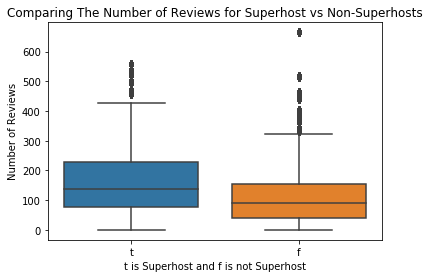

In [100]:
#define the boxplot
sns.boxplot(x="host_is_superhost",
            y="number_of_reviews",
            #define the dataset
            data=merged_1)
#define the title
plt.title('Comparing The Number of Reviews for Superhost vs Non-Superhosts')
#define the x axis
plt.xlabel('t is Superhost and f is not Superhost')
#define the y axis
plt.ylabel('Number of Reviews')